iter  0  shoot point, target 0.0 1
iter  1  shoot point, target 1.7766124775073638e+16 1
iter  2  shoot point, target 8883062387536819.0 1
iter  3  shoot point, target 4441531193768409.5 1
iter  4  shoot point, target 2220765596884204.8 1
iter  5  shoot point, target 1110382798442102.4 1
iter  6  shoot point, target 555191399221051.2 1
iter  7  shoot point, target 277595699610525.6 1
iter  8  shoot point, target 138797849805262.8 1
iter  9  shoot point, target 69398924902631.4 1
iter  10  shoot point, target 34699462451315.7 1
iter  11  shoot point, target 17349731225657.85 1
iter  12  shoot point, target 8674865612828.925 1
iter  13  shoot point, target 4337432806414.4624 1
iter  14  shoot point, target 2168716403207.2312 1
iter  15  shoot point, target 1084358201603.6156 1
iter  16  shoot point, target 542179100801.8078 1
iter  17  shoot point, target 271089550400.9039 1
iter  18  shoot point, target 135544775200.45195 1
iter  19  shoot point, target 67772387600.225975 1
iter  20  sh

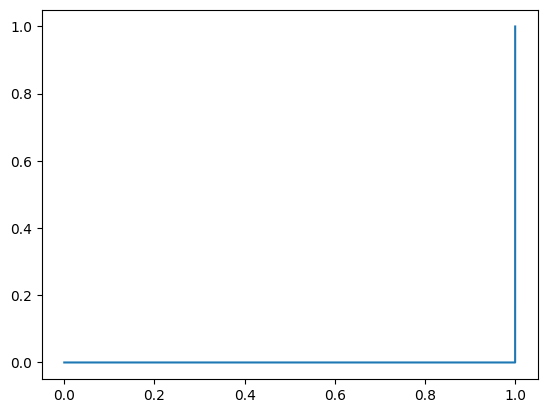

In [37]:
import numpy as np
import matplotlib.pyplot as plt

n = 5.
tend = 1
h = 1e-4
y = [0,0]
targetx = 1
t = 0

def f(t, y):
    f=np.zeros(2)
    #dx/dt
    f[0] = y[1]
    #dV_y/dt
    f[1] = (1/(1-t*t))*(2*t*y[1] - n*(n-1)*y[0])

    return f

def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    
    k1 = h*f(t,y)
    k2 = h*f(t+0.5*h, y+0.5*k1)
    k3 = h*f(t+0.5*h, y+0.5*k2)
    k4 = h*f(t+h, y+k3)
    y = y + (k1 + 2*k2 + 2*k3 + k4)/6
    #print(y)
    return y

xp=[]
yp=[]
ta=[]
vymin= -1
vymax=  1
maxiter=100
for iter in range(maxiter):
    xp=[]
    yp=[]
    ta=[]
    vy=(vymin+vymax)/2.
    y=[0 ,vy]
    t=0
    while(t<tend):
        y = rk4(t,h,y,2)
        xp=np.append(xp,t)
        yp=np.append(yp,y[0])
        ta=np.append(ta,t)
        t = t+h
    
    if y[0]<targetx:
         vymin = vy #please choose vymax=vy or vymin=vy
    else:
         vymax = vy #please choose vymax=vy or vymin=vy
        
    print("iter ",iter, " shoot point, target",y[0],targetx)
 
print("vy, time",vy,t)
plt.show()
plt.plot(xp,yp)
plt.show()